In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math
import librosa
import librosa.display

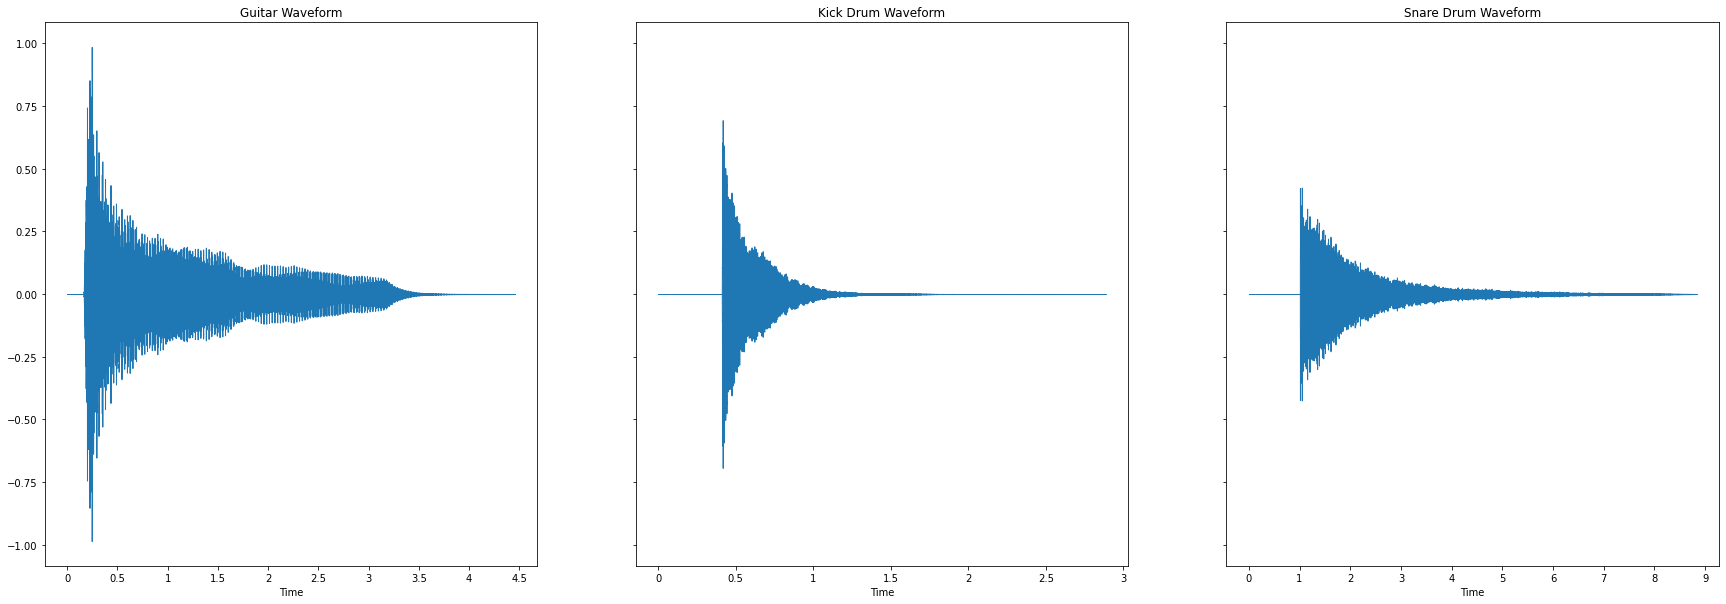

In [12]:
# Import the wav files. It will be loaded in as a numpy array.
# sr represents the samplerate.
# Since we did not specify the samplerate when loading in the files,
# the default will be set to 22050.
guitar, sr = librosa.load('Guitar.wav')
kick, sr = librosa.load('Kick.wav')
snare, sr = librosa.load('Snare.wav')

#Visualizing waveforms
fig, ax = plt.subplots(1,3, figsize = (30,10), sharey = True)
librosa.display.waveshow(guitar, sr=sr, ax=ax[0])
ax[0].set(title = 'Guitar Waveform')
librosa.display.waveshow(kick, sr=sr, ax=ax[1])
ax[1].set(title = 'Kick Drum Waveform')
librosa.display.waveshow(snare, sr=sr, ax=ax[2])
ax[2].set(title = 'Snare Drum Waveform')
plt.show()

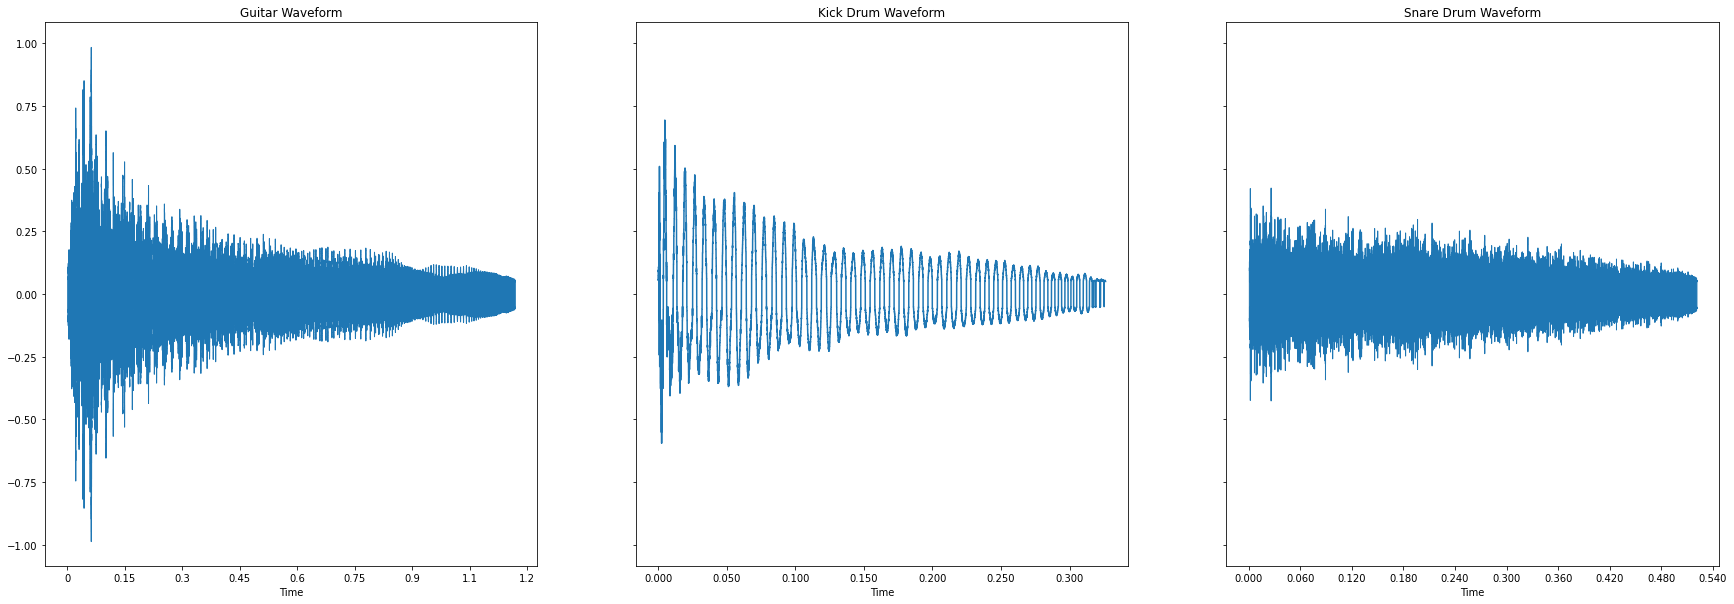

In [18]:
def env_mask(wav, threshold):
    # Absolute value
    wav = np.abs(wav)
    # Point wise mask determination.
    mask = wav > threshold
    return mask
# Initialize mask
g_mask = env_mask(guitar, 0.05)
k_mask = env_mask(kick,  0.05)
s_mask = env_mask(snare, 0.05)
# Plotting the new signals
fig, ax = plt.subplots(1,3, figsize = (30,10), sharey = True)
# Visualize wave plots with mask applied.
librosa.display.waveshow(guitar[g_mask], sr=sr, ax=ax[0])
ax[0].set(title = 'Guitar Waveform')
librosa.display.waveshow(kick[k_mask], sr=sr, ax=ax[1])
ax[1].set(title = 'Kick Drum Waveform')
librosa.display.waveshow(snare[s_mask], sr=sr, ax=ax[2])
ax[2].set(title = 'Snare Drum Waveform')
plt.show()


/var/folders/gd/mvj_v_yd2d595zjv_0952tyc0000gn/T/ipykernel_75493/701702624.py:2: FutureWarning: Pass y=[ 0.05754826  0.06296586  0.06967252 ... -0.05112014 -0.05065534
 -0.05008821] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  guuitarSpec = librosa.feature.melspectrogram(guitar[g_mask])
/var/folders/gd/mvj_v_yd2d595zjv_0952tyc0000gn/T/ipykernel_75493/701702624.py:3: FutureWarning: Pass y=[0.05550083 0.06962398 0.07230529 ... 0.05107394 0.05082089 0.05010044] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  kickSpec = librosa.feature.melspectrogram(kick[k_mask])
/var/folders/gd/mvj_v_yd2d595zjv_0952tyc0000gn/T/ipykernel_75493/701702624.py:4: FutureWarning: Pass y=[-0.10664109  0.09422968 -0.13105252 ... -0.05373163 -0.05086313
  0.0563665 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  snareSpec = librosa.feature.melspectrogram(snar

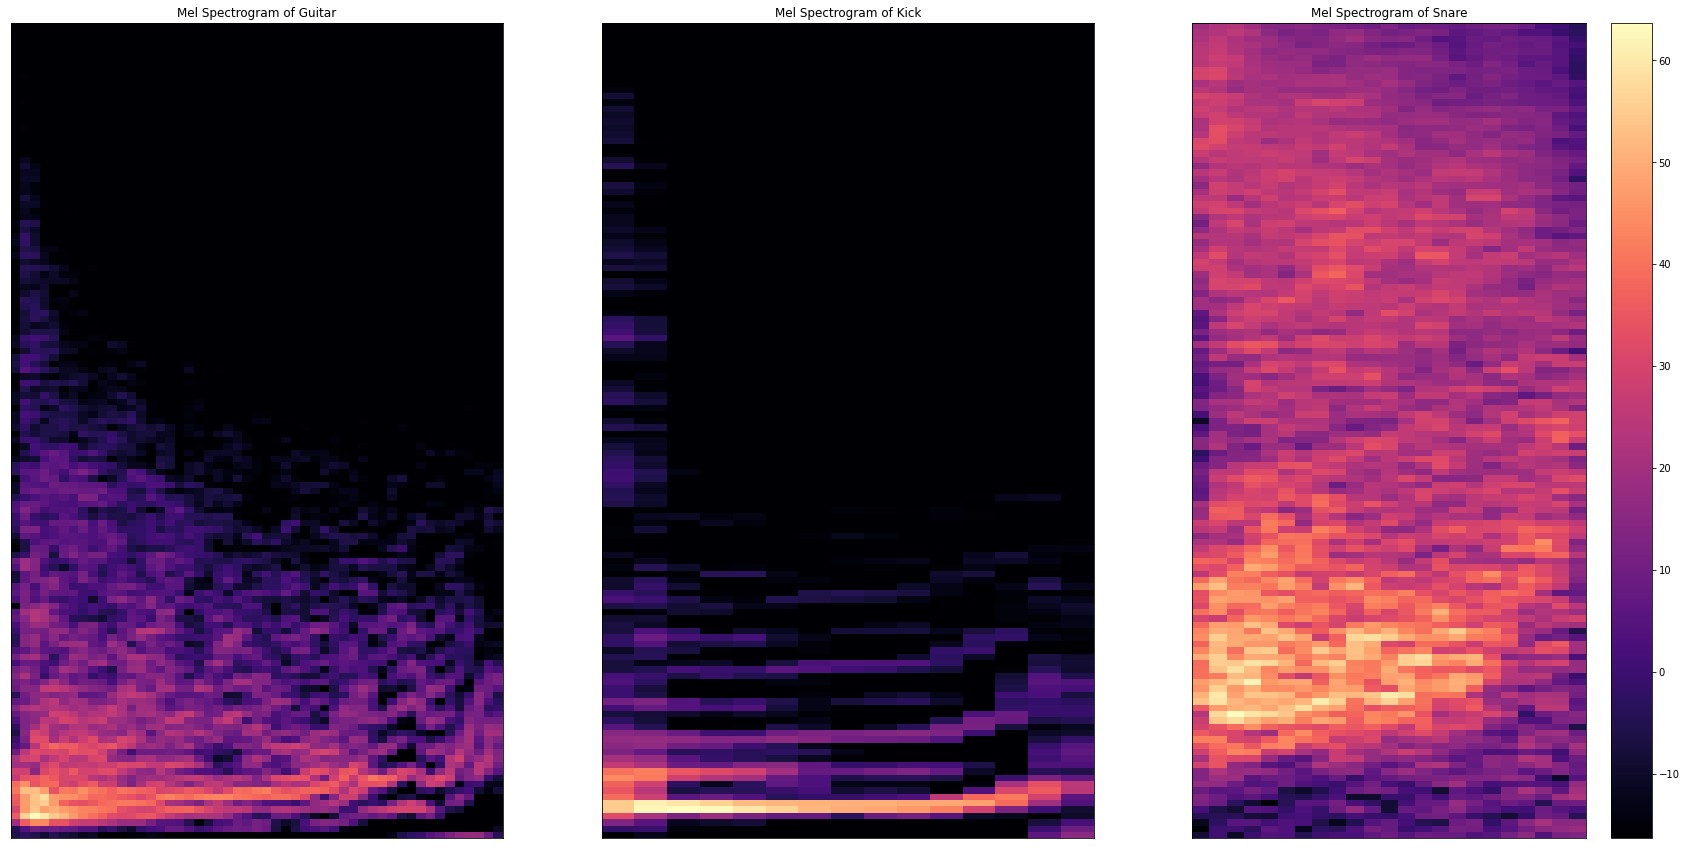

In [22]:
# Create Mel Spectrograms of sounds
guuitarSpec = librosa.feature.melspectrogram(guitar[g_mask])
kickSpec = librosa.feature.melspectrogram(kick[k_mask])
snareSpec = librosa.feature.melspectrogram(snare[s_mask])

# Convert amplitudes to dB
guuitarSpec = librosa.amplitude_to_db(guuitarSpec)
kickSpec = librosa.amplitude_to_db(kickSpec)
snareSpec = librosa.amplitude_to_db(snareSpec)

# Plot mel spectrograms
fig, ax = plt.subplots(1,3, figsize = (30,15))
ax[0].set(title = 'Mel Spectrogram of Guitar')
i = librosa.display.specshow(guuitarSpec, ax=ax[0], cmap = 'magma')
ax[1].set(title = 'Mel Spectrogram of Kick')
librosa.display.specshow(kickSpec, ax=ax[1], cmap = 'magma')
ax[2].set(title = 'Mel Spectrogram of Snare')
librosa.display.specshow(snareSpec, ax=ax[2], cmap = 'magma')
plt.colorbar(i)

In [ ]:
# Take MFCCs of sounds:
guitarSpec = librosa.feature.mfcc(guitar)
kickSnare = librosa.feature.mfcc(kick)
snareMFCC = librosa.feature.mfcc(snare)

# Plot MFCCs
fig, ax = plt.subplots(1,3, figsize = (30,15))
ax[0].set(title = 'MFCCs of Guitar')
i = librosa.display.specshow(guitarSpec, x_axis='time', ax=ax[0])
ax[1].set(title = 'MFCCs of Kick')
librosa.display.specshow(kickSnare, x_axis='time', ax=ax[1])
ax[2].set(title = 'MFCCs of Snare')
librosa.display.specshow(snareMFCC,x_axis='time', ax=ax[2])
plt.colorbar(i)

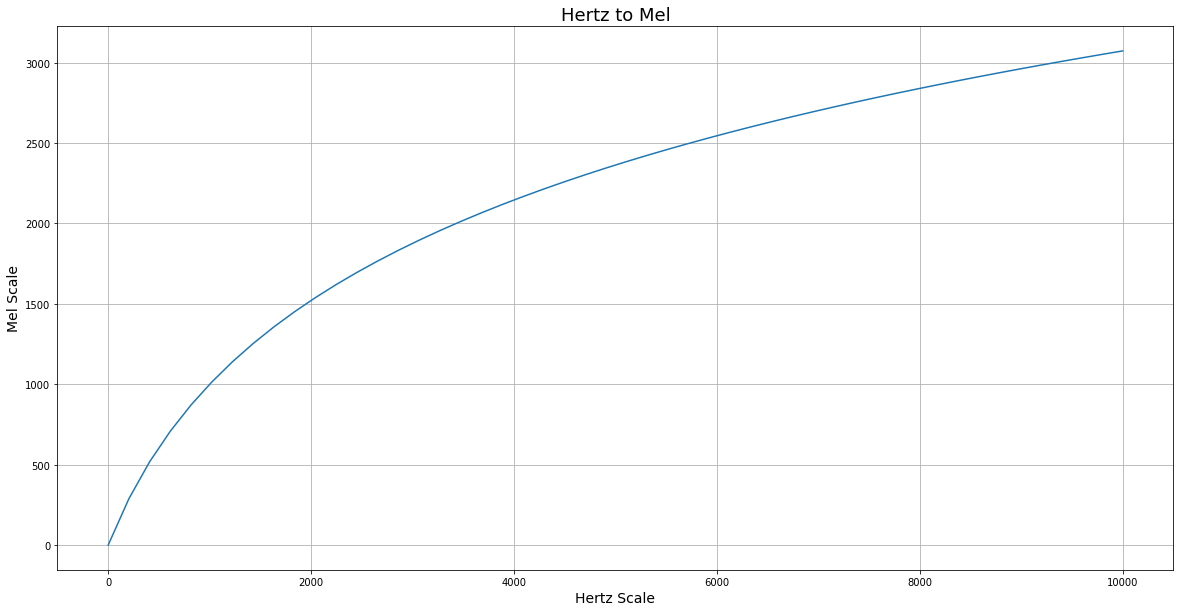

In [3]:

# Create function to convert Hz to Mels
def freqToMel(f):
    return 1127 * math.log(1 + (f/700))

# Vectorize function to apply to numpy arrays
freqToMelv = np.vectorize(freqToMel)

# Observing 0 to 10,000 Hz
Hz = np.linspace(0,1e4) 
# Now we just apply the vectorized function to the Hz variable
Mel = freqToMelv(Hz) 

# Plotting the figure:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(Hz, Mel)
plt.title('Hertz to Mel',fontsize=18)
plt.xlabel('Hertz Scale',fontsize=14)
plt.ylabel('Mel Scale',fontsize=14)
plt.grid(True,'both')
plt.show()

In [4]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt

[array([], dtype=float64)]


/var/folders/gd/mvj_v_yd2d595zjv_0952tyc0000gn/T/ipykernel_75493/4240444282.py:12: RuntimeWarning: divide by zero encountered in log10
  response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))


Text(0.5, 0, 'Normalized frequency [cycles per sample]')

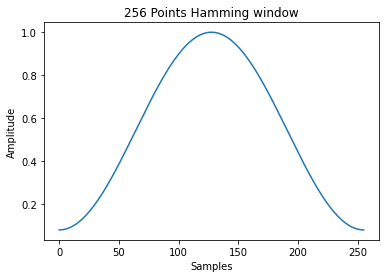

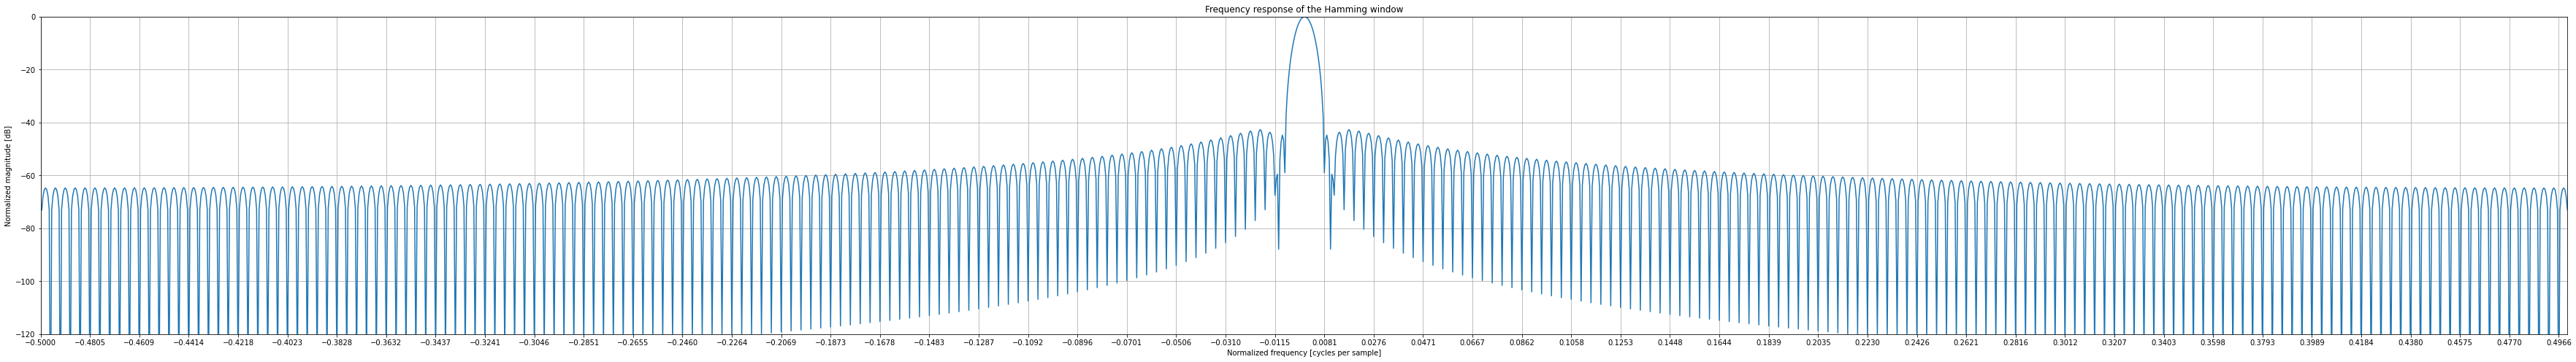

In [6]:
M = 256
hammingWindowDataArray = signal.hamming(M)
plt.plot(hammingWindowDataArray)
plt.title("{} Points Hamming window".format(M))
plt.ylabel("Amplitude")
plt.xlabel("Samples")

plt.figure(figsize=(62,8))
A = fft(hammingWindowDataArray, 2048) / (len(hammingWindowDataArray)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
# print(freq)
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))

# Find size of main Lobe
print([freq[i] for i in np.where(response == -104.50169732125902)])

plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.grid(True,'both')
plt.xticks([freq[i] for i in range(0,len(freq),40)])
plt.title("Frequency response of the Hamming window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")